# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the dataset through univariate & multivariate analysis 
- Investigate distribution of data 
- Extract relevant insights to determine steps for feature engineering

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os 
from collections import Counter

# Manually add path to read from another folder 
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

In [113]:
df = pl.read_csv("../data/cleaned_google_analytics.csv",ignore_errors=True)

In [114]:
df.head()

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
i64,i64,i64,str,str,str,str,str,str,str,str,str,str
20170731,1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Lunch Bag""","""Home/Bags/More Bags/"""
20170731,1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Electronics Accessory Pouch""","""Home/Bags/More Bags/"""
20170731,1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Sport Bag""","""Home/Bags/More Bags/"""
20170731,1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Slim Utility Travel Bag""","""Home/Bags/More Bags/"""
20170731,1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Suitcase Organizer Cubes""","""Home/Bags/More Bags/"""


In [115]:
df.shape

(49512, 13)

In [116]:
df.columns

['date',
 'visitStartTime',
 'fullVisitorId',
 'subContinent',
 'country',
 'city',
 'browser',
 'operatingSystem',
 'deviceCategory',
 'source',
 'transactionId',
 'v2ProductName',
 'v2ProductCategory']

In [117]:
df.dtypes

[Int64,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String]

In [118]:
df.describe()

statistic,date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
str,f64,f64,f64,str,str,str,str,str,str,str,str,str,str
"""count""",49512.0,49512.0,46382.0,"""49512""","""49512""","""49512""","""49512""","""49512""","""49512""","""49512""","""462""","""49512""","""49512"""
"""null_count""",0.0,0.0,3130.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""49050""","""0""","""0"""
"""mean""",2.0170731e7,1.5015e9,4.0388e18,null,null,null,null,null,null,null,null,null,null
"""std""",0.0,21502.167394,2.8116e18,null,null,null,null,null,null,null,null,null,null
"""min""",2.0170731e7,1.5015e9,1.5782e15,"""Australasia""","""Algeria""","""(not set)""","""Amazon Silk""","""(not set)""","""desktop""","""(direct)""","""ORD201707311786""","""1 oz Hand Sanitizer""","""${escCatTitle}"""
"""25%""",2.0170731e7,1.5015e9,1.2146e18,null,null,null,null,null,null,null,null,null,null
"""50%""",2.0170731e7,1.5015e9,4.0460e18,null,null,null,null,null,null,null,null,null,null
"""75%""",2.0170731e7,1.5015e9,6.5967e18,null,null,null,null,null,null,null,null,null,null
"""max""",2.0170731e7,1.5016e9,9.2191e18,"""Western Europe""","""Vietnam""","""not available in demo dataset""","""YaBrowser""","""iOS""","""tablet""","""youtube.com""","""ORD201707312663""","""YouTube Youth Short Sleeve Tee…","""Wearables/Men's T-Shirts/"""


In [119]:
df.select(pl.all().is_null().sum())

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,3130,0,0,0,0,0,0,0,49050,0,0


In [120]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('fullVisitorId').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────────┐
│ fullVisitorId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 1534          │
└───────────────┘


In [121]:
print_popular_stats(df, "city")

city,count
str,u32
"""not available in demo dataset""",24486
"""Mountain View""",4608
"""New York""",3178
"""Sunnyvale""",1585
"""San Francisco""",1488
"""(not set)""",1166
"""San Jose""",1112
"""Los Angeles""",1013
"""Cambridge""",619


In [122]:
# Total transactions 
print("Number of transactions: ",df.select(pl.col("transactionId").is_not_null().sum()))

Number of transactions:  shape: (1, 1)
┌───────────────┐
│ transactionId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 462           │
└───────────────┘


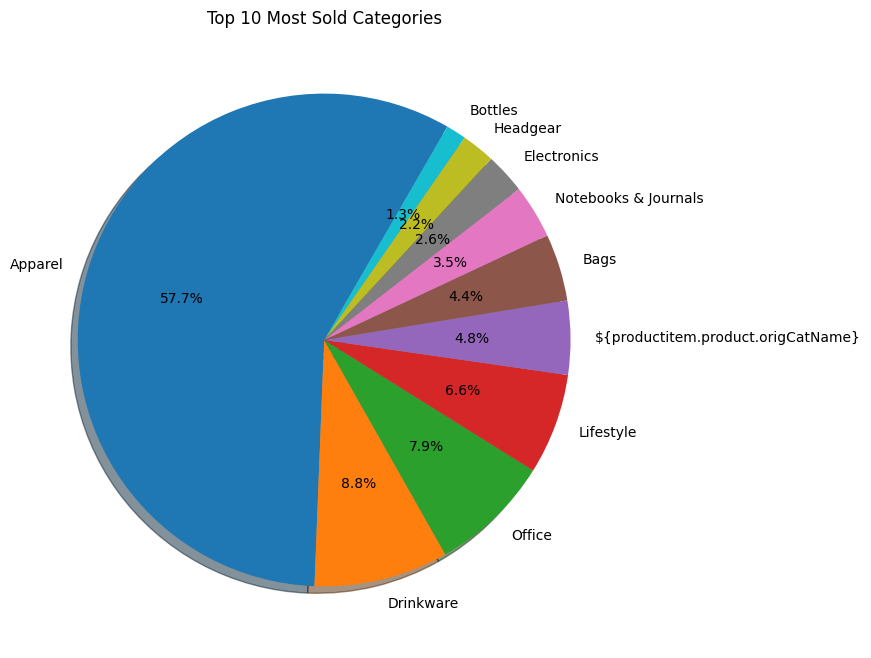

In [123]:
categories = df.filter(pl.col('transactionId') != 'null').select(pl.col('v2ProductCategory'))
categories = categories.select(pl.col("v2ProductCategory").value_counts(sort=True)).unnest("v2ProductCategory")
pie_chart(categories['count'][:10],categories['v2ProductCategory'][:10],'Top 10 Most Sold Categories')

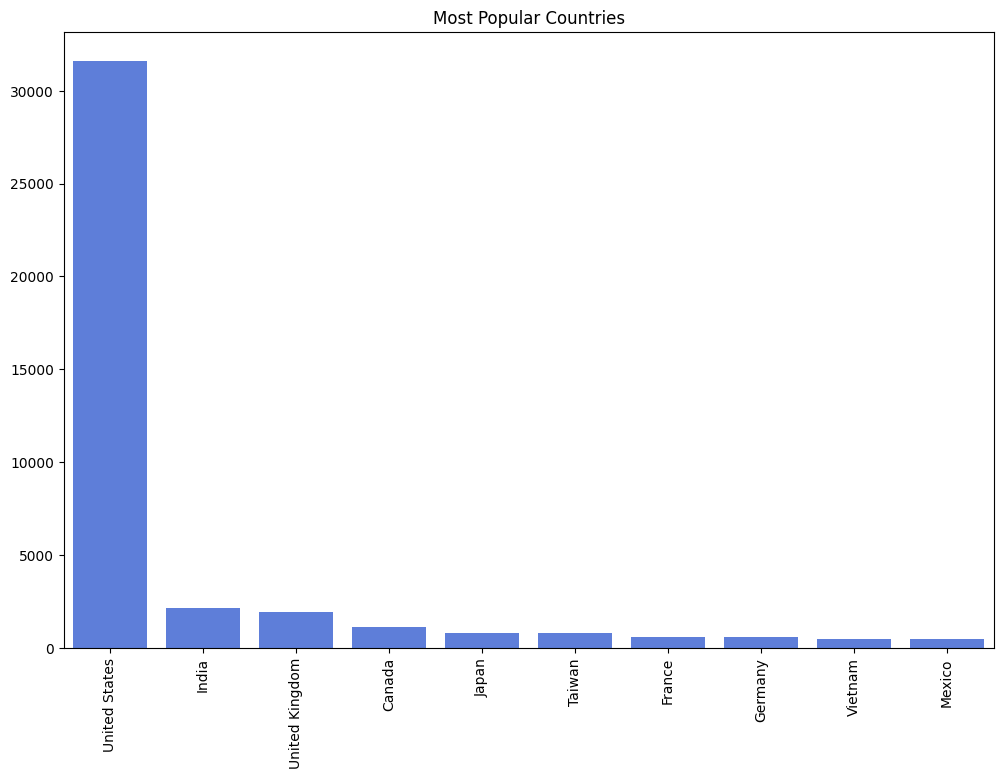

In [138]:
country = print_popular_stats(df, "country")['country'].to_numpy()
count = print_popular_stats(df, "country")['count'].to_numpy()
bar_plot(country, count,"Most Popular Countries")

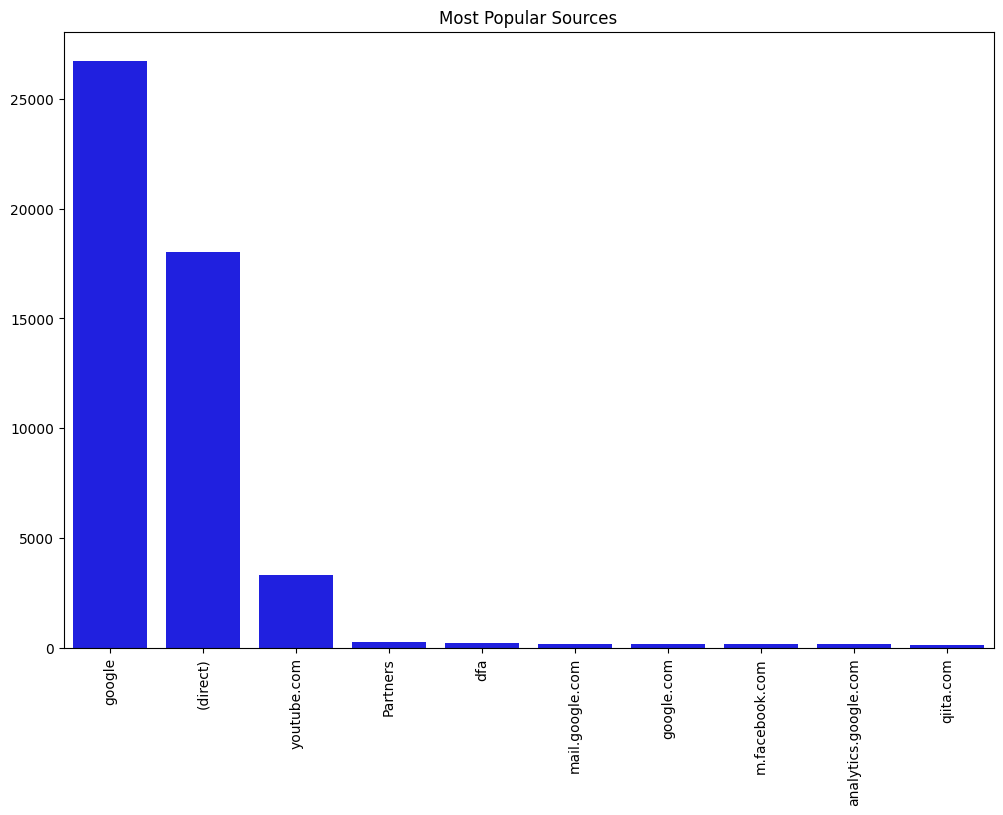

In [125]:
source = print_popular_stats(df, "source")['source'].to_numpy()
count = print_popular_stats(df, "source")['count'].to_numpy()
bar_plot(source, count,"Most Popular Sources")

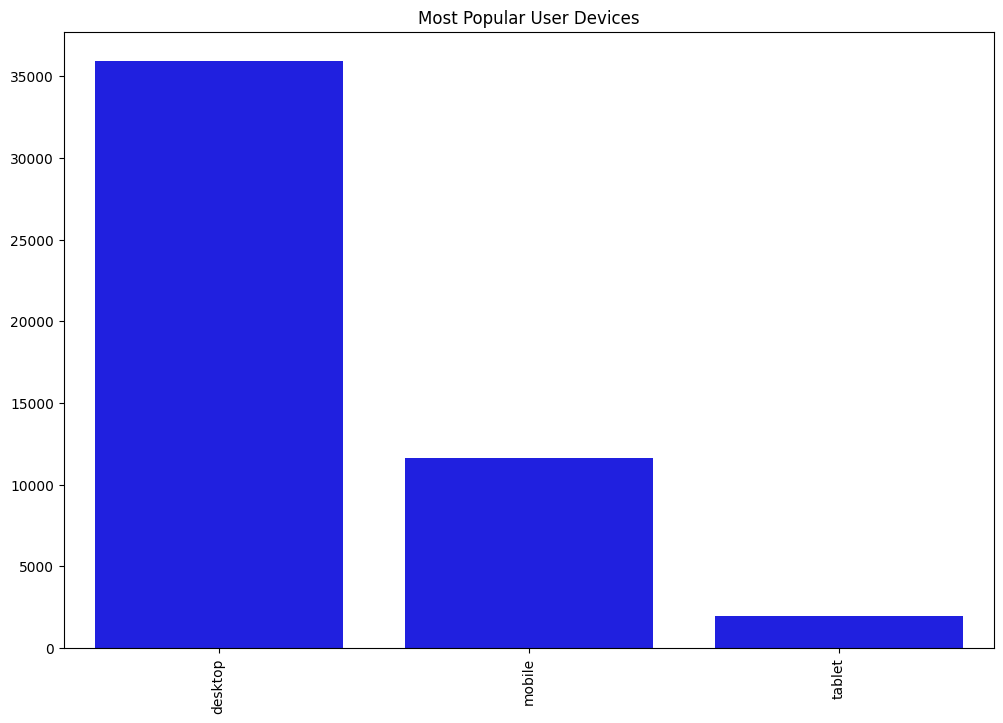

In [126]:
device = print_popular_stats(df, "deviceCategory")['deviceCategory'].to_numpy()
count = print_popular_stats(df, "deviceCategory")['count'].to_numpy()
bar_plot(device, count,"Most Popular User Devices")

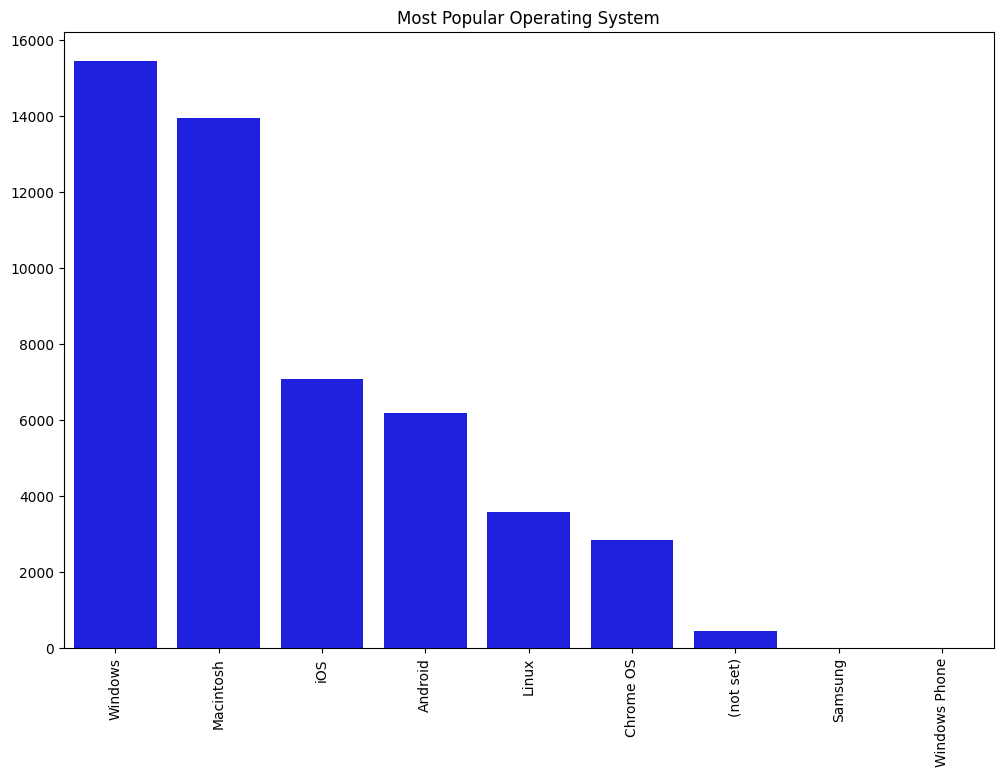

In [127]:
os = print_popular_stats(df, "operatingSystem")['operatingSystem'].to_numpy()
count = print_popular_stats(df, "operatingSystem")['count'].to_numpy()
bar_plot(os, count,"Most Popular Operating System")

In [128]:
grouped = df.group_by(pl.col('country')).agg(pl.col('v2ProductCategory'))
grouped

country,v2ProductCategory
str,list[str]
"""Romania""","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Accessories/Stickers/""]"
"""India""","[""Home/Electronics/Power/"", ""Home/Electronics/Power/"", … ""${escCatTitle}""]"
"""Portugal""","[""Home/Gift Cards/"", ""Home/Gift Cards/"", … ""Home/Shop by Brand/YouTube/""]"
"""Thailand""","[""Home/Apparel/Headgear/"", ""Home/Apparel/Headgear/"", … ""Home/Apparel/Men's/Men's-T-Shirts/""]"
"""Panama""","[""Home/Gift Cards/"", ""Home/Gift Cards/"", … ""Home/Shop by Brand/YouTube/""]"
…,…
"""Croatia""","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]"
"""Pakistan""","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""(not set)""]"
"""Dominican Republic""","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]"


In [129]:
encoded_df = pl.read_csv('../data/encoded_df.csv',ignore_errors=True)
encoded_df.head()

fullVisitorId,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductCategory
i64,f64,f64,f64,f64,f64,f64,i64,f64
2219384770970157334,0.0,0.006208,0.001795,0.005962,0.011631,0.003665,0,0.0
2219384770970157334,0.0,0.006208,0.001795,0.005962,0.011631,0.003665,0,0.0
2219384770970157334,0.0,0.006208,0.001795,0.005962,0.011631,0.003665,0,0.0
2219384770970157334,0.0,0.006208,0.001795,0.005962,0.011631,0.003665,0,0.0
2219384770970157334,0.0,0.006208,0.001795,0.005962,0.011631,0.003665,0,0.0


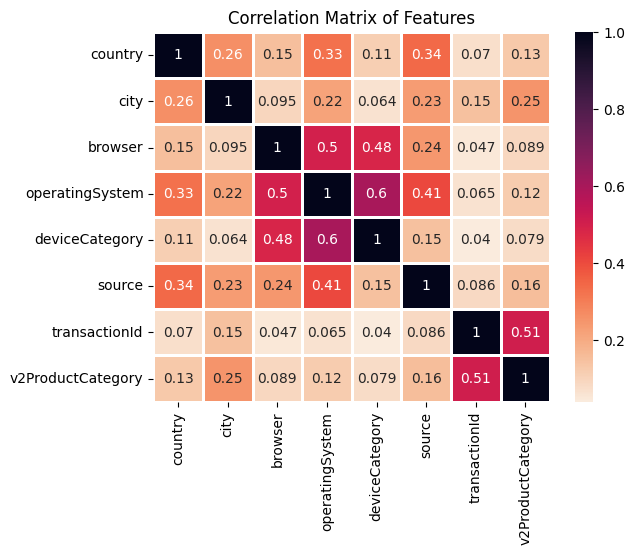

In [130]:
plt.title("Correlation Matrix of Features")
sns.heatmap(encoded_df['country':].corr(), xticklabels=encoded_df.columns[1:], yticklabels=encoded_df.columns[1:],
            annot=True,linewidth=.75, cmap="rocket_r")
plt.show()